In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
df = pd.read_csv("../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4.csv")

In [3]:
df

Field                               ID          RA  \
0           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000122'  149.957794   
1           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000137'  150.534388   
2           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000200'  150.119570   
3           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000231'  150.104989   
4           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000251'  149.944931   
...                   ...                              ...         ...   
2060847  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048324'  358.326089   
2060848  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048211'  357.983195   
2060849  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048420'  358.189227   
2060850  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048652'  357.957820   
2060851  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048808'  359.123890   

               DEC           X          Y      FWHM    FWHM_n   ISOarea  \
0       -24.588993  10330.6650  1033.1914  0.000383  1.234561  0.000002   
1       -24.589628   6898.3530  1042.0739  0.000381  1.227902  0.000003   
2       -24.587243   9367.6540  1049.7621  0.000367  1.184599  0.000004   
3       -24.586636   9454.4780  1053.3187  0.000356  1.148883  0.000004   
4       -24.585065  10407.3860  1058.4563  0.000385  1.243178  0.000003   
...            ...         ...        ...       ...       ...       ...   
2060847   1.057939   7179.7407  7843.4766  0.000316  0.981167  0.000002   
2060848   1.051064   9423.9390  7798.7783  0.000301  0.936742  0.000002   
2060849   1.301481   8075.3257  9437.8100  0.000336  1.043616  0.000003   
2060850   1.285262   9589.8220  9331.9410  0.000319  0.991412  0.000002   
2060851   1.283497   1958.6162  9320.2620  0.000324  1.005392  0.000003   

         KRON_RADIUS  ...  J0410_psf  e_J0410_psf  J0430_psf  e_J0430_psf  \
0           3.242556  ...  18.153698        0.071  17.998697        0.065   
1           3.074517  ...  17.229670        0.049  17.134670        0.048   
2           3.030711  ...  19.439140        0.128  19.209140        0.086   
3           3.193642  ...  17.615140        0.065  17.538141        0.058   
4           3.187768  ...  17.537746        0.061  17.358746        0.063   
...              ...  ...        ...          ...        ...          ...   
2060847     3.362761  ...  17.930109        0.032  17.880110        0.028   
2060848     3.218857  ...  19.645690        0.094        NaN          NaN   
2060849     3.184011  ...  17.896680        0.036  17.764680        0.030   
2060850     3.517311  ...  18.118427        0.033  18.156427        0.034   
2060851     3.330242  ...  18.820793        0.050  18.579792        0.045   

         J0515_psf  e_J0515_psf  J0660_psf  e_J0660_psf  J0861_psf  \
0        17.525698        0.051  17.206259        0.043  17.104158   
1        16.508670        0.041  16.176670        0.126  15.964670   
2        17.697142        0.046  16.147823        0.038  15.237605   
3        16.946140        0.042  16.559822        0.034  16.446606   
4        16.672747        0.051  16.169260        0.038  16.064340   
...            ...          ...        ...          ...        ...   
2060847  17.508220        0.026        NaN          NaN  17.148645   
2060848  18.314690        0.032        NaN          NaN  16.349434   
2060849  17.265680        0.021  17.067595        0.040  16.788515   
2060850  17.658428        0.025  17.525522        0.044  17.293554   
2060851  17.652792        0.026  16.936531        0.029  16.402308   

         e_J0861_psf  
0              0.051  
1              0.041  
2              0.038  
3              0.041  
4              0.050  
...              ...  
2060847        0.029  
2060848        0.027  
2060849        0.027  
2060850        0.037  
2060851        0.022  

[2060852 rows x 86 columns]

In [4]:
#Removing the MC objects
filtered_df = df[~df['ID'].str.contains('MC')]
filtered_df

Field                               ID          RA  \
0           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000122'  149.957794   
1           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000137'  150.534388   
2           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000200'  150.119570   
3           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000231'  150.104989   
4           b'HYDRA-0011'     b'iDR4_3_HYDRA-0011_0000251'  149.944931   
...                   ...                              ...         ...   
2060847  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048324'  358.326089   
2060848  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048211'  357.983195   
2060849  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048420'  358.189227   
2060850  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048652'  357.957820   
2060851  b'STRIPE82-0170'  b'iDR4_3_STRIPE82-0170_0048808'  359.123890   

               DEC           X          Y      FWHM    FWHM_n   ISOarea  \
0       -24.588993  10330.6650  1033.1914  0.000383  1.234561  0.000002   
1       -24.589628   6898.3530  1042.0739  0.000381  1.227902  0.000003   
2       -24.587243   9367.6540  1049.7621  0.000367  1.184599  0.000004   
3       -24.586636   9454.4780  1053.3187  0.000356  1.148883  0.000004   
4       -24.585065  10407.3860  1058.4563  0.000385  1.243178  0.000003   
...            ...         ...        ...       ...       ...       ...   
2060847   1.057939   7179.7407  7843.4766  0.000316  0.981167  0.000002   
2060848   1.051064   9423.9390  7798.7783  0.000301  0.936742  0.000002   
2060849   1.301481   8075.3257  9437.8100  0.000336  1.043616  0.000003   
2060850   1.285262   9589.8220  9331.9410  0.000319  0.991412  0.000002   
2060851   1.283497   1958.6162  9320.2620  0.000324  1.005392  0.000003   

         KRON_RADIUS  ...  J0410_psf  e_J0410_psf  J0430_psf  e_J0430_psf  \
0           3.242556  ...  18.153698        0.071  17.998697        0.065   
1           3.074517  ...  17.229670        0.049  17.134670        0.048   
2           3.030711  ...  19.439140        0.128  19.209140        0.086   
3           3.193642  ...  17.615140        0.065  17.538141        0.058   
4           3.187768  ...  17.537746        0.061  17.358746        0.063   
...              ...  ...        ...          ...        ...          ...   
2060847     3.362761  ...  17.930109        0.032  17.880110        0.028   
2060848     3.218857  ...  19.645690        0.094        NaN          NaN   
2060849     3.184011  ...  17.896680        0.036  17.764680        0.030   
2060850     3.517311  ...  18.118427        0.033  18.156427        0.034   
2060851     3.330242  ...  18.820793        0.050  18.579792        0.045   

         J0515_psf  e_J0515_psf  J0660_psf  e_J0660_psf  J0861_psf  \
0        17.525698        0.051  17.206259        0.043  17.104158   
1        16.508670        0.041  16.176670        0.126  15.964670   
2        17.697142        0.046  16.147823        0.038  15.237605   
3        16.946140        0.042  16.559822        0.034  16.446606   
4        16.672747        0.051  16.169260        0.038  16.064340   
...            ...          ...        ...          ...        ...   
2060847  17.508220        0.026        NaN          NaN  17.148645   
2060848  18.314690        0.032        NaN          NaN  16.349434   
2060849  17.265680        0.021  17.067595        0.040  16.788515   
2060850  17.658428        0.025  17.525522        0.044  17.293554   
2060851  17.652792        0.026  16.936531        0.029  16.402308   

         e_J0861_psf  
0              0.051  
1              0.041  
2              0.038  
3              0.041  
4              0.050  
...              ...  
2060847        0.029  
2060848        0.027  
2060849        0.027  
2060850        0.037  
2060851        0.022  

[1793739 rows x 86 columns]

In [5]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [6]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=5,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [7]:
# Convert the data into an Astropy Table
tab = Table.from_pandas(filtered_df)


In [8]:
tab.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'FWHM',
 'FWHM_n',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX_INST',
 'PETRO_RADIUS',
 'SEX_FLAGS_DET',
 'SEX_NUMBER_DET',
 'CLASS_STAR',
 's2n_DET_PStotal',
 'THETA',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 's2n_r_PStotal',
 's2n_J0660_PStotal',
 's2n_i_PStotal',
 'FWHM_r',
 'FWHM_n_r',
 'FWHM_J0660',
 'FWHM_n_J0660',
 'FWHM_i',
 'FWHM_n_i',
 'SEX_FLAGS_r',
 'SEX_FLAGS_J0660',
 'SEX_FLAGS_i',
 'CLASS_STAR_r',
 'CLASS_STAR_J0660',
 'CLASS_STAR_i',
 'r_PStotal',
 'e_r_PStotal',
 'g_PStotal',
 'e_g_PStotal',
 'i_PStotal',
 'e_i_PStotal',
 'u_PStotal',
 'e_u_PStotal',
 'z_PStotal',
 'e_z_PStotal',
 'J0378_PStotal',
 'e_J0378_PStotal',
 'J0395_PStotal',
 'e_J0395_PStotal',
 'J0410_PStotal',
 'e_J0410_PStotal',
 'J0430_PStotal',
 'e_J0430_PStotal',
 'J0515_PStotal',
 'e_J0515_PStotal',
 'J0660_PStotal',
 'e_J0660_PStotal',
 'J0861_PStotal',
 'e_J0861_PStotal',
 'r_psf',
 'e_r_psf',
 'g

In [9]:
# See the dimesion of the CCD
print(tab['X'].max())
print(tab['Y'].max())

10675.626
10402.077


### All data 

In [10]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.20, x_values)

In [11]:
y_values1 = equation(0.35, 0.30, x_values)

In [12]:
ri_all = tab["r_PStotal"] - tab["i_PStotal"]
rj660_all = tab["r_PStotal"] - tab["J0660_PStotal"]

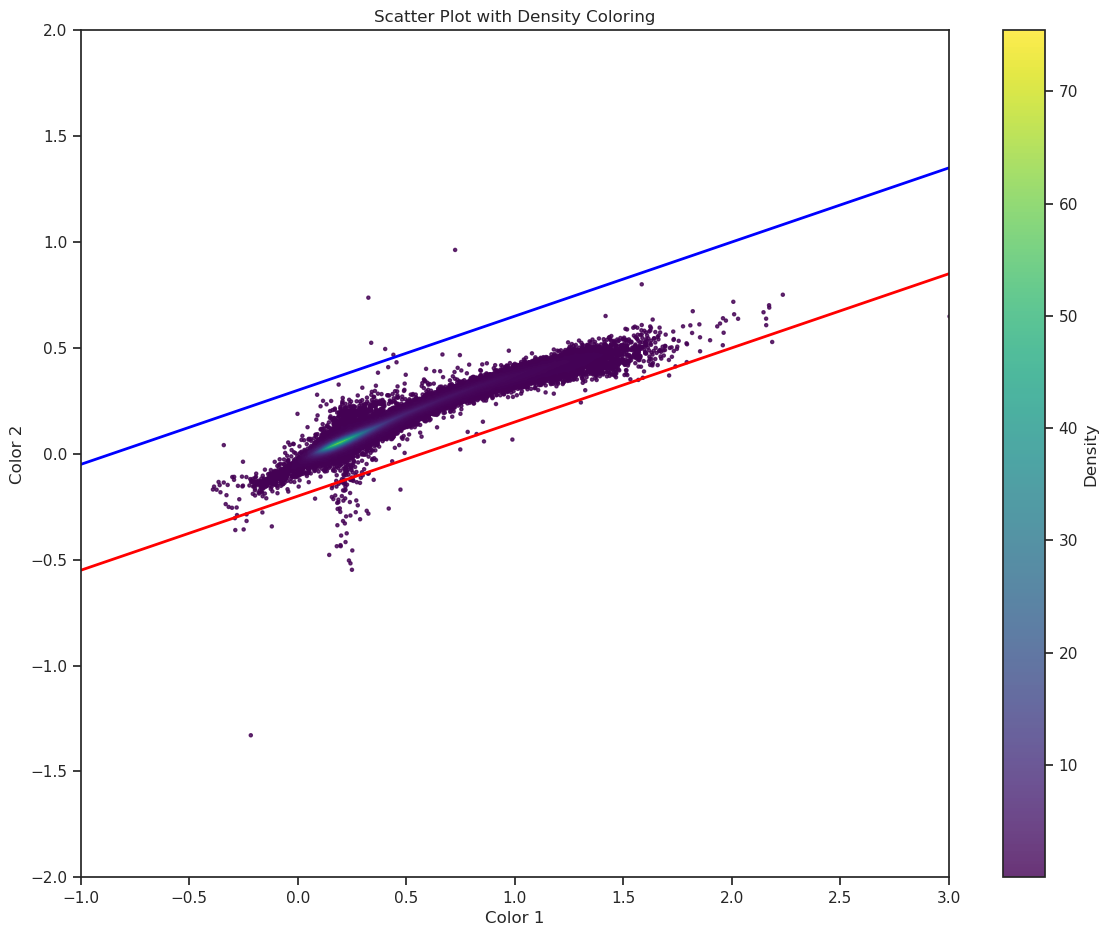

In [13]:
plots(ri_all, rj660_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2), sample_size=100000)

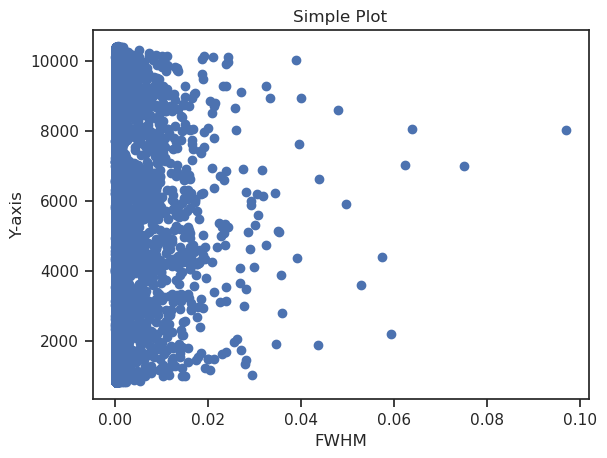

In [15]:
# Create a plot
plt.plot(tab["FWHM"], tab["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()

#### Subsamples

In [16]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit_lower_all = (rj660_all <= 0.35*ri_all - 0.20)
color_crit_lower_all_vert = (ri_all >= 0.15) & (ri_all <= 0.25) 
mask_color_crit_lower_all = color_crit_lower_all & color_crit_lower_all_vert 

# upper_line = rj660 < equation(ri)
color_crit_upper_all = (rj660_all >= 0.35*ri_all + 0.30)

In [17]:
tab_below_all = tab[mask_color_crit_lower_all]

ri_below_all = tab_below_all["r_PStotal"] - tab_below_all["i_PStotal"]
rj660_below_all = tab_below_all["r_PStotal"] - tab_below_all["J0660_PStotal"]

In [18]:
tab_upper_all = tab[color_crit_upper_all]

ri_upper_all = tab_upper_all["r_PStotal"] - tab_upper_all["i_PStotal"]
rj660_upper_all = tab_upper_all["r_PStotal"] - tab_upper_all["J0660_PStotal"]

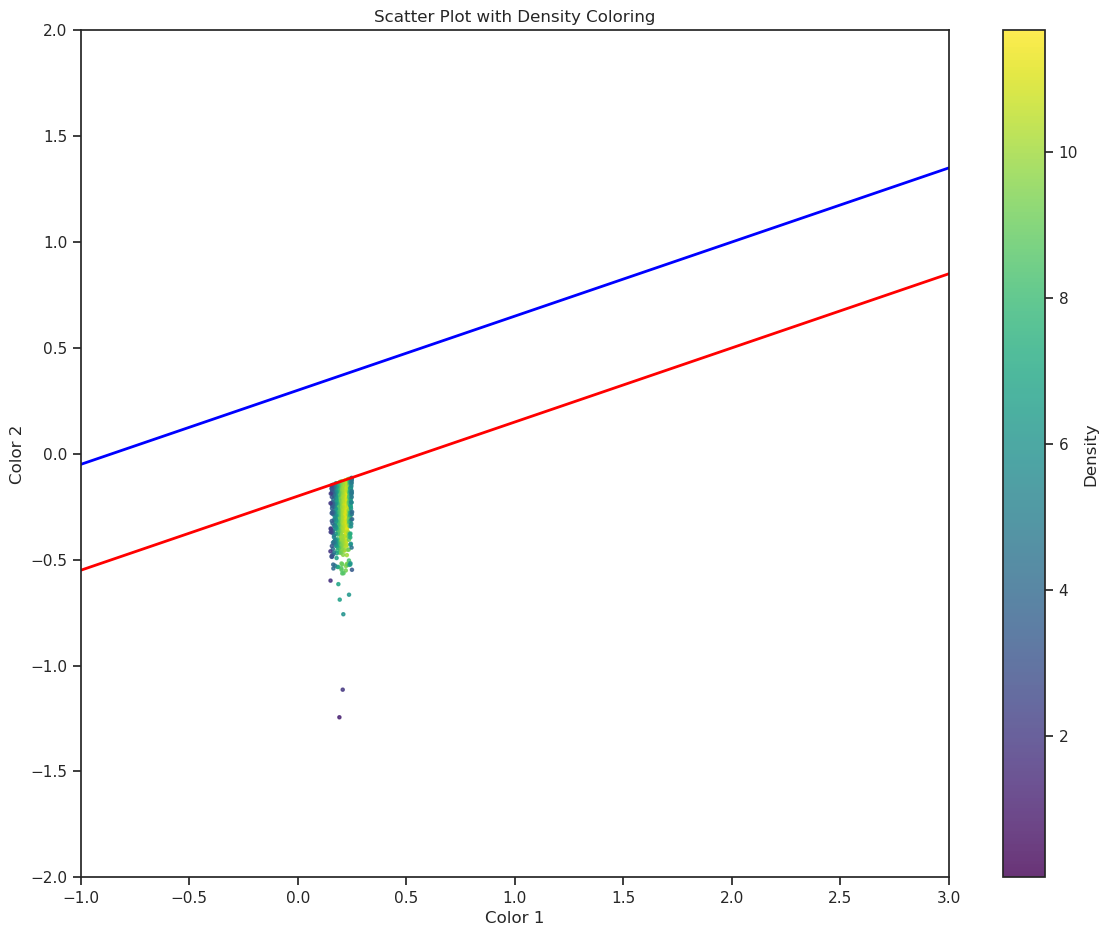

In [19]:
plots(ri_below_all, rj660_below_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))

In [20]:
df_bellow_all = tab_below_all.to_pandas()
#Select columns 
df_bellow_all_ = df_bellow_all[["RA", "DEC", "X", "Y", "FWHM", "FWHM_n", "FWHM_r", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_all_)

In [103]:
# Creating the equation for the border
x_valuesss = np.linspace(1000, 11000, 100)  
# Compute y values using the equation
y_valuesss = equation(-0.1, 9000, x_valuesss)


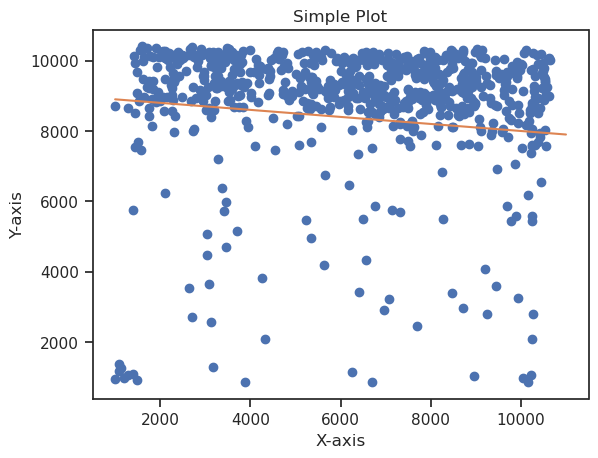

In [104]:
# Create a plot
plt.plot(tab_below_all["X"], tab_below_all['Y'], "o")
plt.plot(x_valuesss, y_valuesss)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


In [106]:
tmp = tab_below_all["Y"] <= -0.1*tab_below_all["X"] + 9000
tab_below_all_tmp = tab_below_all[tmp]

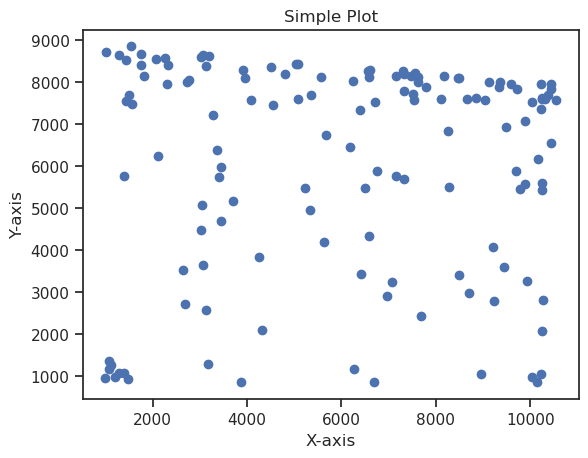

In [107]:
# Create a plot
plt.plot(tab_below_all_tmp["X"], tab_below_all_tmp['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


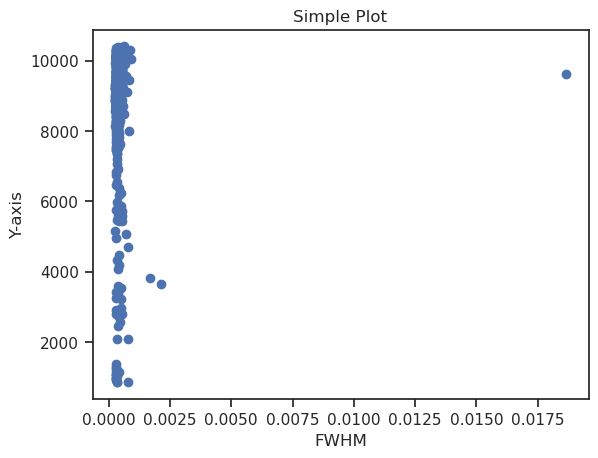

In [105]:
# Create a plot
plt.plot(tab_below_all["FWHM"], tab_below_all["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


In [23]:
print("Min FWHM:", tab_below_all["FWHM"].min())
print("Max FWHM:", tab_below_all["FWHM"].max())

Min FWHM: 0.00026291262
Max FWHM: 0.018648108


In [24]:
tab_below_all_df = tab_below_all.to_pandas()
# Save Pandas DataFrame to CSV file
tab_below_all_df.to_csv("../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4_below_all.csv", index=False)

## Upper

In [25]:
tab_upper_all

<Table length=185>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...  float64    float64    float64    float64    float64    float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... --------- ----------- --------- ----------- --------- -----------
   b'HYDRA-0014'    b'iDR4_3_HYDRA-0014_0040477' 155.15874147191832  -23.75442669396225  6853.704 6509.1787 0.00031687832 ... 17.488314       0.023 16.955956       0.087  17.08386        0.03
   b'HYDRA-0024'    b'iDR4_3_HYDRA-0024_0023328' 155.32350062751797 -25.448560916252635  8577.831 4523.1514   0.000330169 ...  17.74844       0.029 17.213911       0.027 17.601973       0.056
   b'HYDRA-0033'    b'iDR4_3_HYDRA-0033_0044128' 154.09468089895353 -26.596423316043342  9259.074 6101.5586 0.00034481758 ... 18.243473       0.025 16.758795       0.014 15.922646        0.02
   b'HYDRA-0035'    b'iDR4_3_HYDRA-0035_0008770' 157.10398687209212 -27.180305458142357 10105.141   2274.62  0.0003359262 ... 17.383392       0.046 16.650637        0.02 16.335047       0.023
   b'HYDRA-0036'    b'iDR4_3_HYDRA-0036_0042344'  159.1447270478591 -26.339426809995544  7430.185  7790.718  0.0003009748 ... 17.453405       0.043 16.909588       0.022  16.61403       0.027
   b'HYDRA-0038'    b'iDR4_3_HYDRA-0038_0038447' 162.86743717487985  -26.36764646182596  4117.285 7607.1943  0.0004491965 ... 17.862858       0.024  17.57564       0.126 17.318005       0.035
   b'HYDRA-0041'    b'iDR4_3_HYDRA-0041_0030453'  152.7880019367992  -28.08591451713852 6264.7925 5443.4854 0.00031268317 ... 17.194016       0.029 17.849737       0.232 16.569527       0.022
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0017281' 155.41380944451143 -28.379861093060537  9487.987 3508.4163 0.00036454207 ...        --          --  16.89286       0.023 17.139921       0.039
             ...                             ...                ...                 ...       ...       ...           ... ...       ...         ...       ...         ...       ...         ...
b'STRIPE82-0110' b'iDR4_3_STRIPE82-0110_0039390'  316.5666337758751  0.7398710825926058 2204.1252  5761.662 0.00048521787 ... 17.345928       0.027 16.979713       0.018 16.790401       0.025
b'STRIPE82-0111' b'iDR4_3_STRIPE82-0111_0028090'  317.9118420913478 -0.8808729733163627 2676.2253  4316.436 0.00031962857 ... 16.265135       0.014 15.703463       0.011 15.515327       0.018
b'STRIPE82-0113' b'iDR4_3_STRIPE82-0113_0007457'  318.1524167383622 -1.2252131019564807 10377.676 2061.9666 0.00036340745 ... 16.555807        0.02 16.492289       0.013 16.439259       0.018
b'STRIPE82-0113' b'iDR4_3_STRIPE82-0113_0028997'  318.4985590255185  -0.789729783682243   8112.45 4913.0513  0.0003772291 ... 17.054361       0.019 17.078793       0.015 17.051079       0.029
b'STRIPE82-0114' b'iDR4_3_STRIPE82-0114_0055005'  319.1645156825277    1.10756909238002 3753.9333  8168.349 0.00042370288 ... 17.679342       0.028 16.968664       0.016  16.63003       0.026
b'STRIPE82-0150' b'iDR4_3_STRIPE82-0150_0018595'  344.6725372972141  0.7010046707980824 3778.5828  5507.125  0.0005280074 ... 16.903772       0.021 16.041607       0.051 16.218512       0.016
b'STRIPE82-0151' b'iDR4_3_STRIPE82-0151_0047940' 345.03752447964683 -0.0542384264729224 10667.134  9727.448  0.0015166493 ... 16.352106       0.029 15.978483       0.043 16.316479       0.087
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0033829'  358.6284735542664  1.4102706852913824  5200.809 10149.786  0.0024886974 ... 15.857865        0.02        --          -- 14.277841       0.022

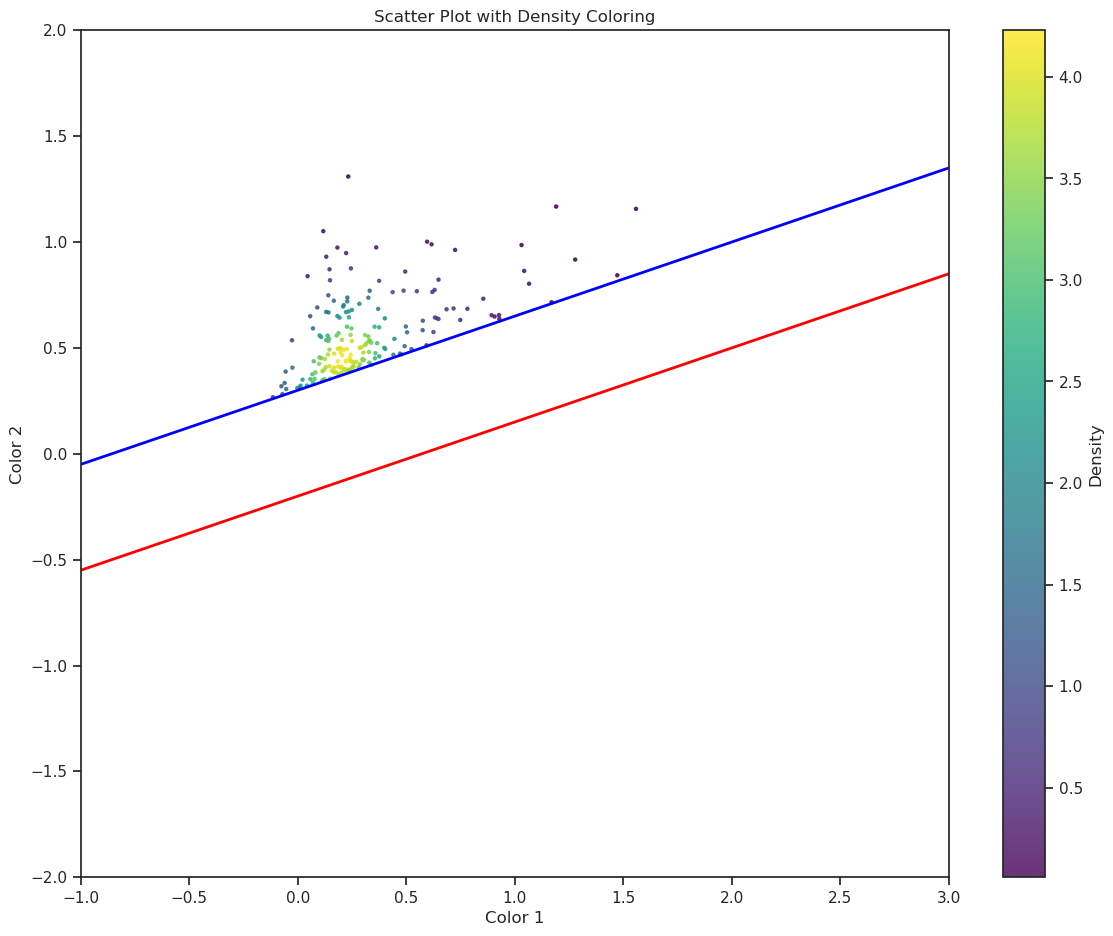

In [26]:
plots(ri_upper_all, rj660_upper_all, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))

In [27]:
df_upper_all = tab_upper_all.to_pandas()
#Select columns 
df_upper_all_ = df_upper_all[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_all_)

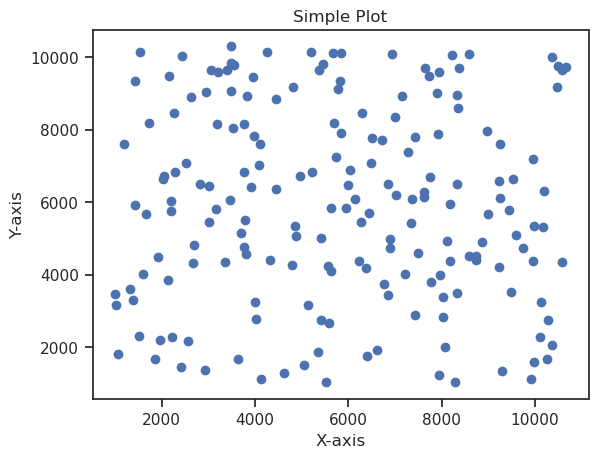

In [28]:
# Create a plot
plt.plot(tab_upper_all["X"], tab_upper_all['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


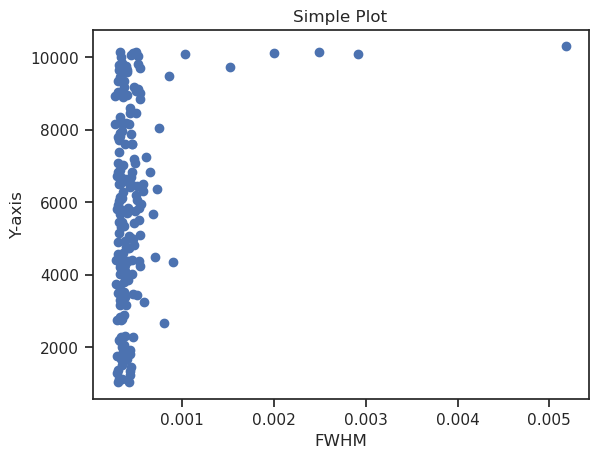

In [29]:
# Create a plot
plt.plot(tab_upper_all["FWHM"], tab_upper_all["Y"], "o")

# Add labels and title
plt.xlabel('FWHM')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()

In [30]:
print("Min FWHM:", tab_upper_all["FWHM"].min())
print("Max FWHM:", tab_upper_all["FWHM"].max())

Min FWHM: 0.00026714572
Max FWHM: 0.0051810234


### Cleaning

In [108]:
# Masking, usar FLATS menor que 4
# Masking
m_x = (tab["r_PStotal"] > 16) & (tab["r_PStotal"] <= 17.5) & (tab["J0660_PStotal"] <= 19.4) & (tab["i_PStotal"] <= 19.2)#& (tab["CLASS_STAR_R"] >= 0.6)
m_err = (tab["e_r_PStotal"]  <= 0.2) & (tab["e_J0660_PStotal"]  <= 0.2) & (tab["e_i_PStotal"]  <= 0.2)
# m_sn = (tab["SNR_WIN_R"]  >= 15) & (tab["SNR_WIN_F660"]  >= 15) & (tab["SNR_WIN_I"]  >= 15)
m_sn = (tab["s2n_r_PStotal"]  > 10) & (tab["s2n_J0660_PStotal"]  > 10) & (tab["s2n_i_PStotal"]  > 10)

# More restrictivo class star
m_star = tab["CLASS_STAR"] > 0.8

valid_ellipticity_range = (0.1, 0.8)  # Example valid range for ellipticity
valid_elongation_range = (1.0, 3.0)   # Example valid range for elongation
shape_mask = (tab['ELLIPTICITY'] >= valid_ellipticity_range[0]) & \
             (tab['ELLIPTICITY'] <= valid_ellipticity_range[1]) & \
             (tab['ELONGATION'] >= valid_elongation_range[0]) & \
             (tab['ELONGATION'] <= valid_elongation_range[1])

# Just ellpticity
m_ell = tab['ELLIPTICITY'] < 0.5

# Radius enclosing 50% of the total flux
m_rad_50 = tab["FLUX_RADIUS_50"] < 3

valid_fwhm_range = (0.0008, 1000.0)  # Example valid range for FWHM in pixels
fwhm_mask = (tab['FWHM'] >= valid_fwhm_range[0]) & \
            (tab['FWHM'] <= valid_fwhm_range[1])

# And the problematics borders
borders = tab["Y"] <= -0.1*tab["X"] + 9000


mask = m_x & m_err & m_ell & m_rad_50 & m_sn & borders #& fwhm_mask  # Use fwhm_mask instead of valid_fwhm_range
tab_clean = tab[mask]


In [109]:
tab_clean

<Table length=1437745>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...  float64    float64    float64    float64    float64    float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... --------- ----------- --------- ----------- --------- -----------
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000122' 149.95779351072906 -24.588993162849363 10330.665 1033.1914 0.00038261065 ... 17.525698       0.051 17.206259       0.043 17.104158       0.051
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000137' 150.53438843177778 -24.589628435940263  6898.353 1042.0739 0.00038054702 ...  16.50867       0.041  16.17667       0.126  15.96467       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000200' 150.11957039012938 -24.587242536374468  9367.654 1049.7621 0.00036712646 ... 17.697142       0.046 16.147823       0.038 15.237605       0.038
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000231' 150.10498873868107 -24.586636004731165  9454.478 1053.3187  0.0003560575 ...  16.94614       0.042 16.559822       0.034 16.446606       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000251' 149.94493140038858  -24.58506458729816 10407.386 1058.4563 0.00038528105 ... 16.672747       0.051  16.16926       0.038  16.06434        0.05
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000258' 150.20432856777433 -24.585943983095145  8863.133 1060.4884 0.00036169682 ... 16.559212       0.038 16.198776       0.034 16.064566       0.041
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000275'  150.0963243009554  -24.58362137225116  9506.151 1072.8041 0.00035416606 ... 17.386658       0.043 16.822823        0.04 16.600042       0.048
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0000303' 150.25721891091845 -24.583908741321757  8548.333 1075.0433 0.00034676297 ... 17.876438       0.049 17.222729       0.036 17.009333       0.051
             ...                             ...                ...                 ...       ...       ...           ... ...       ...         ...       ...         ...       ...         ...
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0046247'  357.9706919447156  1.0805406829885509  9505.749 7991.7524 0.00031559204 ... 17.189262       0.022        --          -- 16.718344       0.027
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0046356'  358.8124439322165  1.0595352697891558  3996.791 7853.9087 0.00030851903 ... 17.752916       0.025 16.309208       0.026 15.247448       0.027
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0047314'  357.9766683213219   1.026300540744779  9466.679 7636.6846 0.00036175313 ... 17.238682       0.022        --          -- 16.650492       0.041
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0047516' 358.29301286576805  1.0659658559255485 7396.2104  7896.035 0.00030620754 ...  18.37022       0.036  16.89782        0.03 15.731645       0.025
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0047751'  357.9065368477127   1.081443946021467   9925.66 7997.7544 0.00034475737 ... 17.072142       0.018  16.86544       0.029 16.647242       0.027
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048045'  358.8832916722264  1.0566377174551629 3533.1194  7834.982 0.00032305167 ...  17.47556       0.023 17.326761       0.027  17.06364       0.025
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048324'  358.3260894219256   1.057939385205069 7179.7407 7843.4766 0.00031575747 ...  17.50822       0.026        --          -- 17.148645       0.029
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048211'  357.9831949522526  1.0510638273883102  9423.939 7798.7783 0.00030146056 ...  18.31469       0.032        --          -- 16.349434       0.027

In [110]:
ri = tab_clean["r_PStotal"] - tab_clean["i_PStotal"]
rj660 = tab_clean["r_PStotal"] - tab_clean["J0660_PStotal"]

In [111]:
print(len(ri), len(rj660), len(x_values), len(y_values), len(y_values1))

1437745 1437745 100 100 100


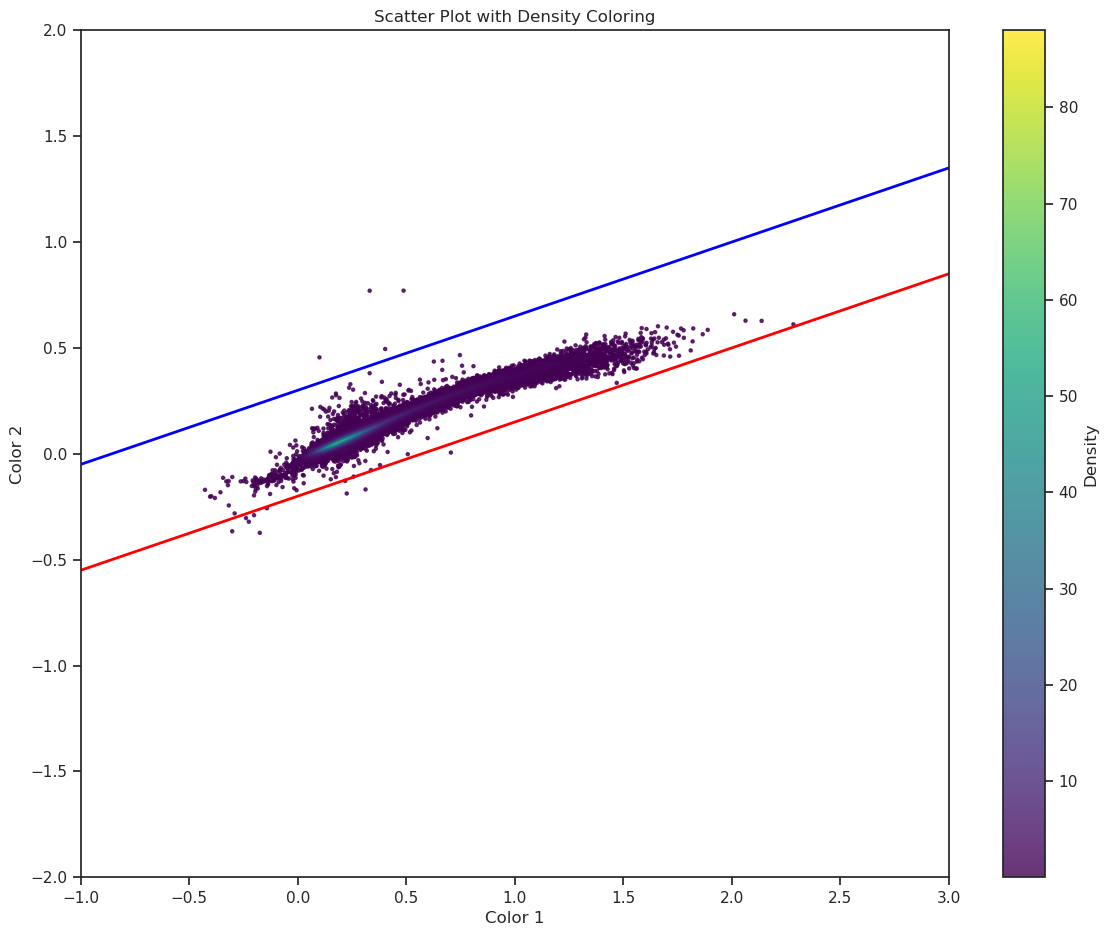

In [112]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2), sample_size=50000)

In [113]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.15)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.30)

In [114]:
tab_clean_below = tab_clean[color_crit]

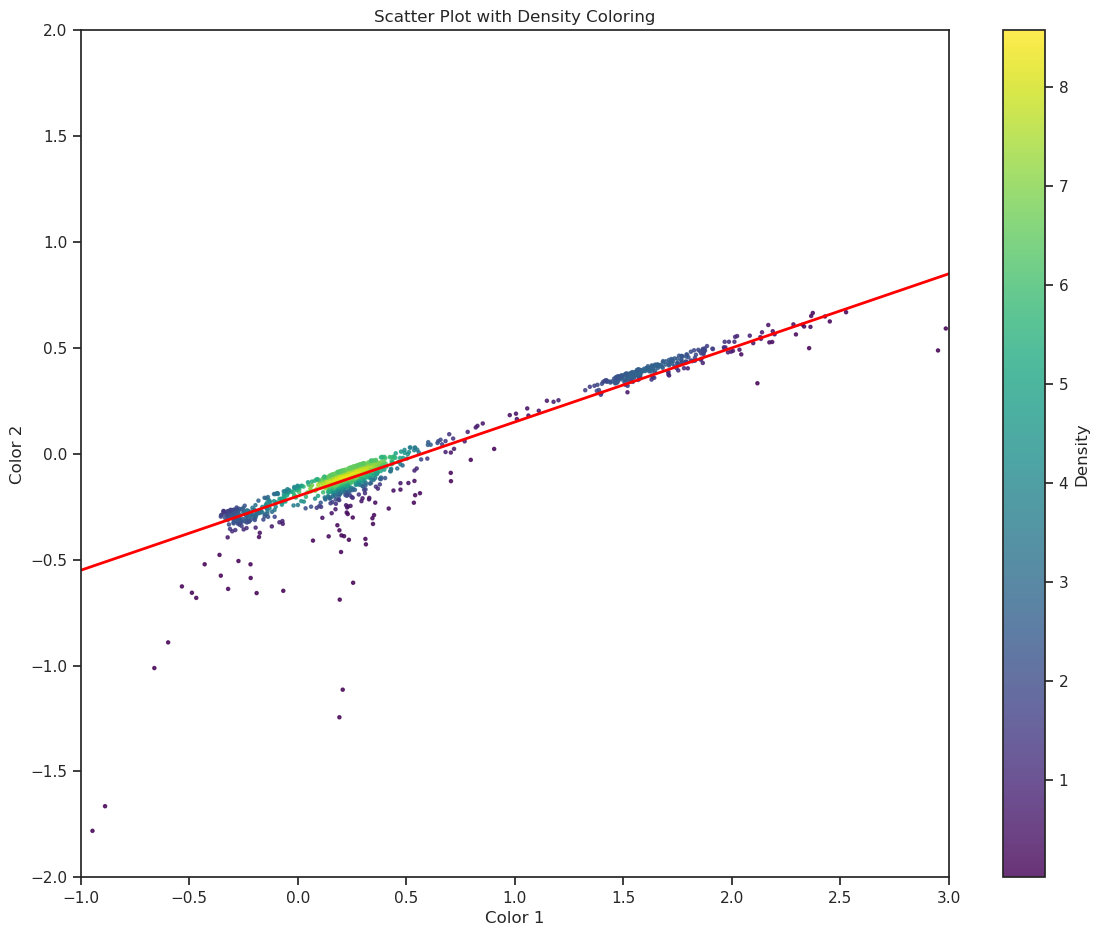

In [115]:
ri_below = tab_clean_below["r_PStotal"] - tab_clean_below["i_PStotal"]
rj660_below = tab_clean_below["r_PStotal"] - tab_clean_below["J0660_PStotal"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.0, 3), ylim=(-2, 2))


In [116]:
tab_clean_below

<Table length=1222>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...  float64    float64    float64    float64    float64    float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... --------- ----------- --------- ----------- --------- -----------
   b'HYDRA-0011'    b'iDR4_3_HYDRA-0011_0034245'  150.0515166804695 -23.886637899134215  9796.064  5633.974 0.00031121555 ... 16.878632       0.048 16.436203       0.056 15.973889       0.032
   b'HYDRA-0015'    b'iDR4_3_HYDRA-0015_0022584' 157.44280002200802  -23.91882011371778 2390.7585  5428.503 0.00034464253 ...   17.6896       0.038 16.399351       0.013 15.951295       0.024
   b'HYDRA-0020'    b'iDR4_3_HYDRA-0020_0039416' 164.87845271485384  -23.45721291208204  3920.844  8454.268  0.0003187039 ... 18.600054       0.041 17.091543       0.018 15.248063       0.018
   b'HYDRA-0021'    b'iDR4_3_HYDRA-0021_0034771' 150.45521142842586 -25.305543486517333  9723.404 5454.0347 0.00029013053 ...  16.85195       0.019 17.449257       0.031  17.76884       0.038
   b'HYDRA-0021'    b'iDR4_3_HYDRA-0021_0052429'  150.4660820078083  -24.95970964968348  9670.938  7718.149 0.00030397874 ... 18.139011       0.042 17.551527       0.031 17.198822       0.036
   b'HYDRA-0023'    b'iDR4_3_HYDRA-0023_0005695' 153.56582076171424  -25.87570405449292   9740.49 1721.5636 0.00033206874 ...  18.09048       0.039  17.72976       0.031 17.392174       0.045
   b'HYDRA-0025'    b'iDR4_3_HYDRA-0025_0037158'  157.8010107596342 -25.180805206990676 3140.4912 6278.2544 0.00046300094 ... 18.669329       0.043 16.928194       0.013 14.643252       0.012
   b'HYDRA-0027'    b'iDR4_3_HYDRA-0027_0001935' 160.51111476563935 -25.964449610792336 5549.7334 1152.2394 0.00056436326 ... 18.542128       0.043 17.110521       0.013 15.473884       0.014
             ...                             ...                ...                 ...       ...       ...           ... ...       ...         ...       ...         ...       ...         ...
b'STRIPE82-0151' b'iDR4_3_STRIPE82-0151_0009086' 345.48145360959074 -1.1136022829994312  7760.423 2793.1052 0.00035106338 ... 17.247028       0.023  17.09426       0.029 16.838314       0.034
b'STRIPE82-0151' b'iDR4_3_STRIPE82-0151_0021571'  345.7791149599071 -0.7562042291766663 5812.4077  5132.615  0.0003475599 ...  19.19771       0.153  17.93327       0.289 15.980319       0.051
b'STRIPE82-0158' b'iDR4_3_STRIPE82-0158_0002964'   349.792189916092  0.0998540651786236 7376.2163 1572.1371  0.0003313763 ... 17.382809       0.026 15.968496       0.019 14.344558       0.016
b'STRIPE82-0158' b'iDR4_3_STRIPE82-0158_0013817'  349.9075893126829  0.4753284138253849 6620.7324 4029.9292 0.00035126603 ... 16.637312       0.019 17.250765       0.023 17.343653       0.032
b'STRIPE82-0159' b'iDR4_3_STRIPE82-0159_0002643' 350.87601330414105 -1.2387440719002114 9558.3955 1973.5961  0.0004343193 ... 16.822605       0.028 16.689726       0.025 16.578907       0.054
b'STRIPE82-0162' b'iDR4_3_STRIPE82-0162_0041012' 352.76581838768124  1.0608103710050774  6466.252 7862.2227  0.0003406969 ... 17.462885       0.034  16.62432       0.034 17.343147       0.037
b'STRIPE82-0165' b'iDR4_3_STRIPE82-0165_0012380'  355.0985835556992 -0.8908247584705212  9751.125 4251.0854  0.0006285616 ... 17.481375       0.022  17.30891        0.02 16.697044       0.022
b'STRIPE82-0165' b'iDR4_3_STRIPE82-0165_0024493'  356.3164423279791 -0.3206570439212677 1779.8485  7983.405 0.00061220117 ... 16.673767       0.015 16.527142       0.012 16.319715       0.017

In [117]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

<Table length=138>
     Field                      ID                       RA                 DEC             X         Y          FWHM     ... J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf  e_J0861_psf
     str16                    str31                   float64             float64        float64   float64     float64    ...  float64    float64    float64    float64    float64     float64  
---------------- ------------------------------- ------------------ ------------------- --------- --------- ------------- ... --------- ----------- --------- ----------- ---------- -----------
   b'HYDRA-0014'    b'iDR4_3_HYDRA-0014_0040477' 155.15874147191832  -23.75442669396225  6853.704 6509.1787 0.00031687832 ... 17.488314       0.023 16.955956       0.087   17.08386        0.03
   b'HYDRA-0024'    b'iDR4_3_HYDRA-0024_0023328' 155.32350062751797 -25.448560916252635  8577.831 4523.1514   0.000330169 ...  17.74844       0.029 17.213911       0.027  17.601973       0.056
   b'HYDRA-0033'    b'iDR4_3_HYDRA-0033_0044128' 154.09468089895353 -26.596423316043342  9259.074 6101.5586 0.00034481758 ... 18.243473       0.025 16.758795       0.014  15.922646        0.02
   b'HYDRA-0035'    b'iDR4_3_HYDRA-0035_0008770' 157.10398687209212 -27.180305458142357 10105.141   2274.62  0.0003359262 ... 17.383392       0.046 16.650637        0.02  16.335047       0.023
   b'HYDRA-0036'    b'iDR4_3_HYDRA-0036_0042344'  159.1447270478591 -26.339426809995544  7430.185  7790.718  0.0003009748 ... 17.453405       0.043 16.909588       0.022   16.61403       0.027
   b'HYDRA-0038'    b'iDR4_3_HYDRA-0038_0038447' 162.86743717487985  -26.36764646182596  4117.285 7607.1943  0.0004491965 ... 17.862858       0.024  17.57564       0.126  17.318005       0.035
   b'HYDRA-0041'    b'iDR4_3_HYDRA-0041_0030453'  152.7880019367992  -28.08591451713852 6264.7925 5443.4854 0.00031268317 ... 17.194016       0.029 17.849737       0.232  16.569527       0.022
   b'HYDRA-0043'    b'iDR4_3_HYDRA-0043_0017281' 155.41380944451143 -28.379861093060537  9487.987 3508.4163 0.00036454207 ...        --          --  16.89286       0.023  17.139921       0.039
             ...                             ...                ...                 ...       ...       ...           ... ...       ...         ...       ...         ...        ...         ...
b'STRIPE82-0098' b'iDR4_3_STRIPE82-0098_0043111' 307.27721473665054  0.6875337877070881  7345.155  5418.958 0.00046925727 ... 18.305292       0.039 16.558786       0.069  16.457798       0.022
b'STRIPE82-0107' b'iDR4_3_STRIPE82-0107_0051163' 314.07101301474023 -0.3797768804759817  9261.988 7596.4023  0.0003792398 ... 17.207457       0.026 16.290943       0.013 15.8775215       0.022
b'STRIPE82-0110' b'iDR4_3_STRIPE82-0110_0039390'  316.5666337758751  0.7398710825926058 2204.1252  5761.662 0.00048521787 ... 17.345928       0.027 16.979713       0.018  16.790401       0.025
b'STRIPE82-0111' b'iDR4_3_STRIPE82-0111_0028090'  317.9118420913478 -0.8808729733163627 2676.2253  4316.436 0.00031962857 ... 16.265135       0.014 15.703463       0.011  15.515327       0.018
b'STRIPE82-0113' b'iDR4_3_STRIPE82-0113_0007457'  318.1524167383622 -1.2252131019564807 10377.676 2061.9666 0.00036340745 ... 16.555807        0.02 16.492289       0.013  16.439259       0.018
b'STRIPE82-0113' b'iDR4_3_STRIPE82-0113_0028997'  318.4985590255185  -0.789729783682243   8112.45 4913.0513  0.0003772291 ... 17.054361       0.019 17.078793       0.015  17.051079       0.029
b'STRIPE82-0114' b'iDR4_3_STRIPE82-0114_0055005'  319.1645156825277    1.10756909238002 3753.9333  8168.349 0.00042370288 ... 17.679342       0.028 16.968664       0.016   16.63003       0.026
b'STRIPE82-0150' b'iDR4_3_STRIPE82-0150_0018595'  344.6725372972141  0.7010046707980824 3778.5828  5507.125  0.0005280074 ... 16.903772       0.021 16.041607       0.051  16.218512       0.016

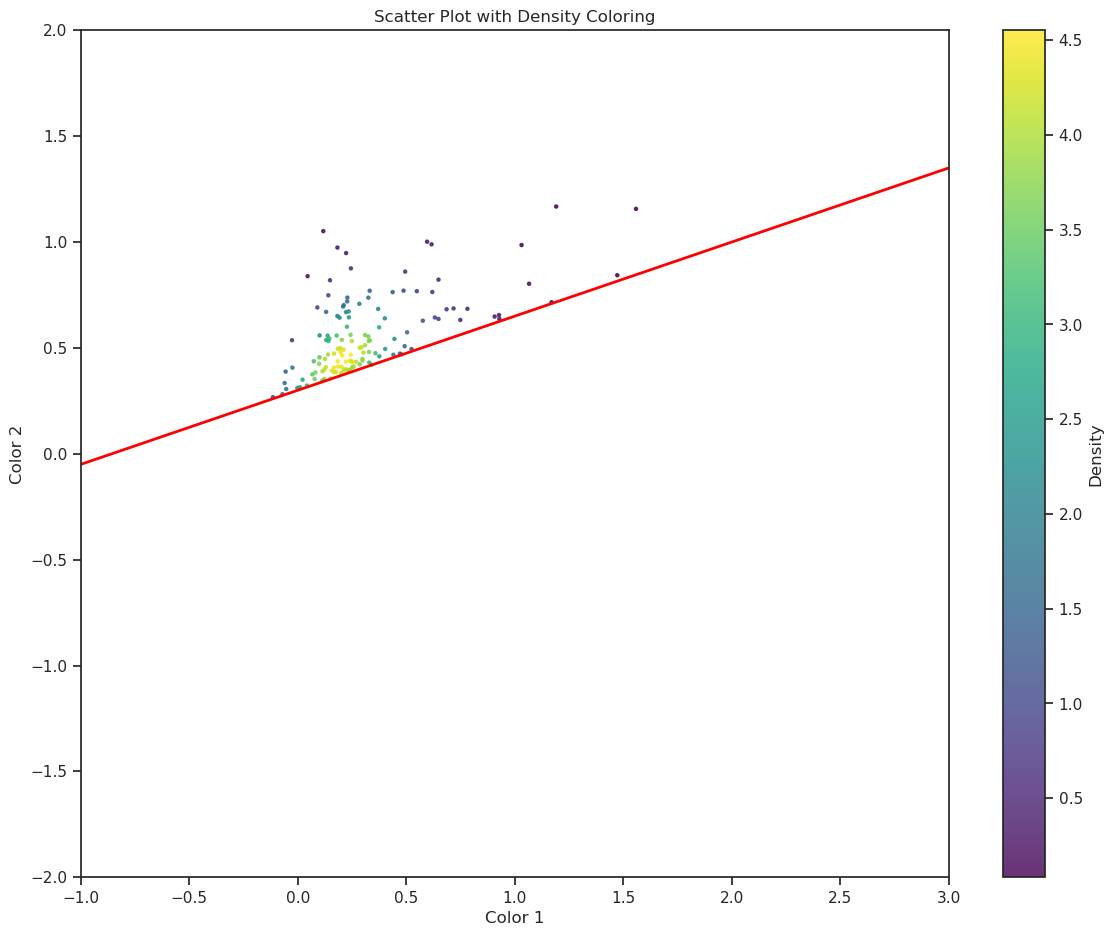

In [118]:
ri_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["i_PStotal"]
rj660_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["J0660_PStotal"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.0, 3), ylim=(-2, 2))


In [42]:
len(tab_clean_below["Field"])
   

2614

In [43]:
for i in tab_clean_below["Field"]:
    print(i)

b'HYDRA-0011'
b'HYDRA-0011'
b'HYDRA-0014'
b'HYDRA-0015'
b'HYDRA-0016'
b'HYDRA-0020'
b'HYDRA-0020'
b'HYDRA-0021'
b'HYDRA-0021'
b'HYDRA-0023'
b'HYDRA-0025'
b'HYDRA-0025'
b'HYDRA-0027'
b'HYDRA-0028'
b'HYDRA-0028'
b'HYDRA-0031'
b'HYDRA-0031'
b'HYDRA-0033'
b'HYDRA-0033'
b'HYDRA-0034'
b'HYDRA-0035'
b'HYDRA-0037'
b'HYDRA-0038'
b'HYDRA-0040'
b'HYDRA-0041'
b'HYDRA-0041'
b'HYDRA-0043'
b'HYDRA-0043'
b'HYDRA-0044'
b'HYDRA-0046'
b'HYDRA-0047'
b'HYDRA-0048'
b'HYDRA-0048'
b'HYDRA-0050'
b'HYDRA-0051'
b'HYDRA-0051'
b'HYDRA-0052'
b'HYDRA-0053'
b'HYDRA-0053'
b'HYDRA-0055'
b'HYDRA-0056'
b'HYDRA-0057'
b'HYDRA-0057'
b'HYDRA-0058'
b'HYDRA-0059'
b'HYDRA-0062'
b'HYDRA-0062'
b'HYDRA-0064'
b'HYDRA-0065'
b'HYDRA-0065'
b'HYDRA-0066'
b'HYDRA-0066'
b'HYDRA-0067'
b'HYDRA-0069'
b'HYDRA-0069'
b'HYDRA-0070'
b'HYDRA-0070'
b'HYDRA-0070'
b'HYDRA-0071'
b'HYDRA-0073'
b'HYDRA-0077'
b'HYDRA-0077'
b'HYDRA-0077'
b'HYDRA-0077'
b'HYDRA-0078'
b'HYDRA-0079'
b'HYDRA-0079'
b'HYDRA-0081'
b'HYDRA-0081'
b'HYDRA-0083'
b'HYDRA-0084'
b'HYDR

In [44]:
# Saving
# Save the table as a CSV file
#tab_clean_below.write('iDR4-SPLUS-PStotal-PSF-16r175_class06_flags4_bellow.csv', format='csv', overwrite=True)


Examining the position of these object on the CCD

In [45]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


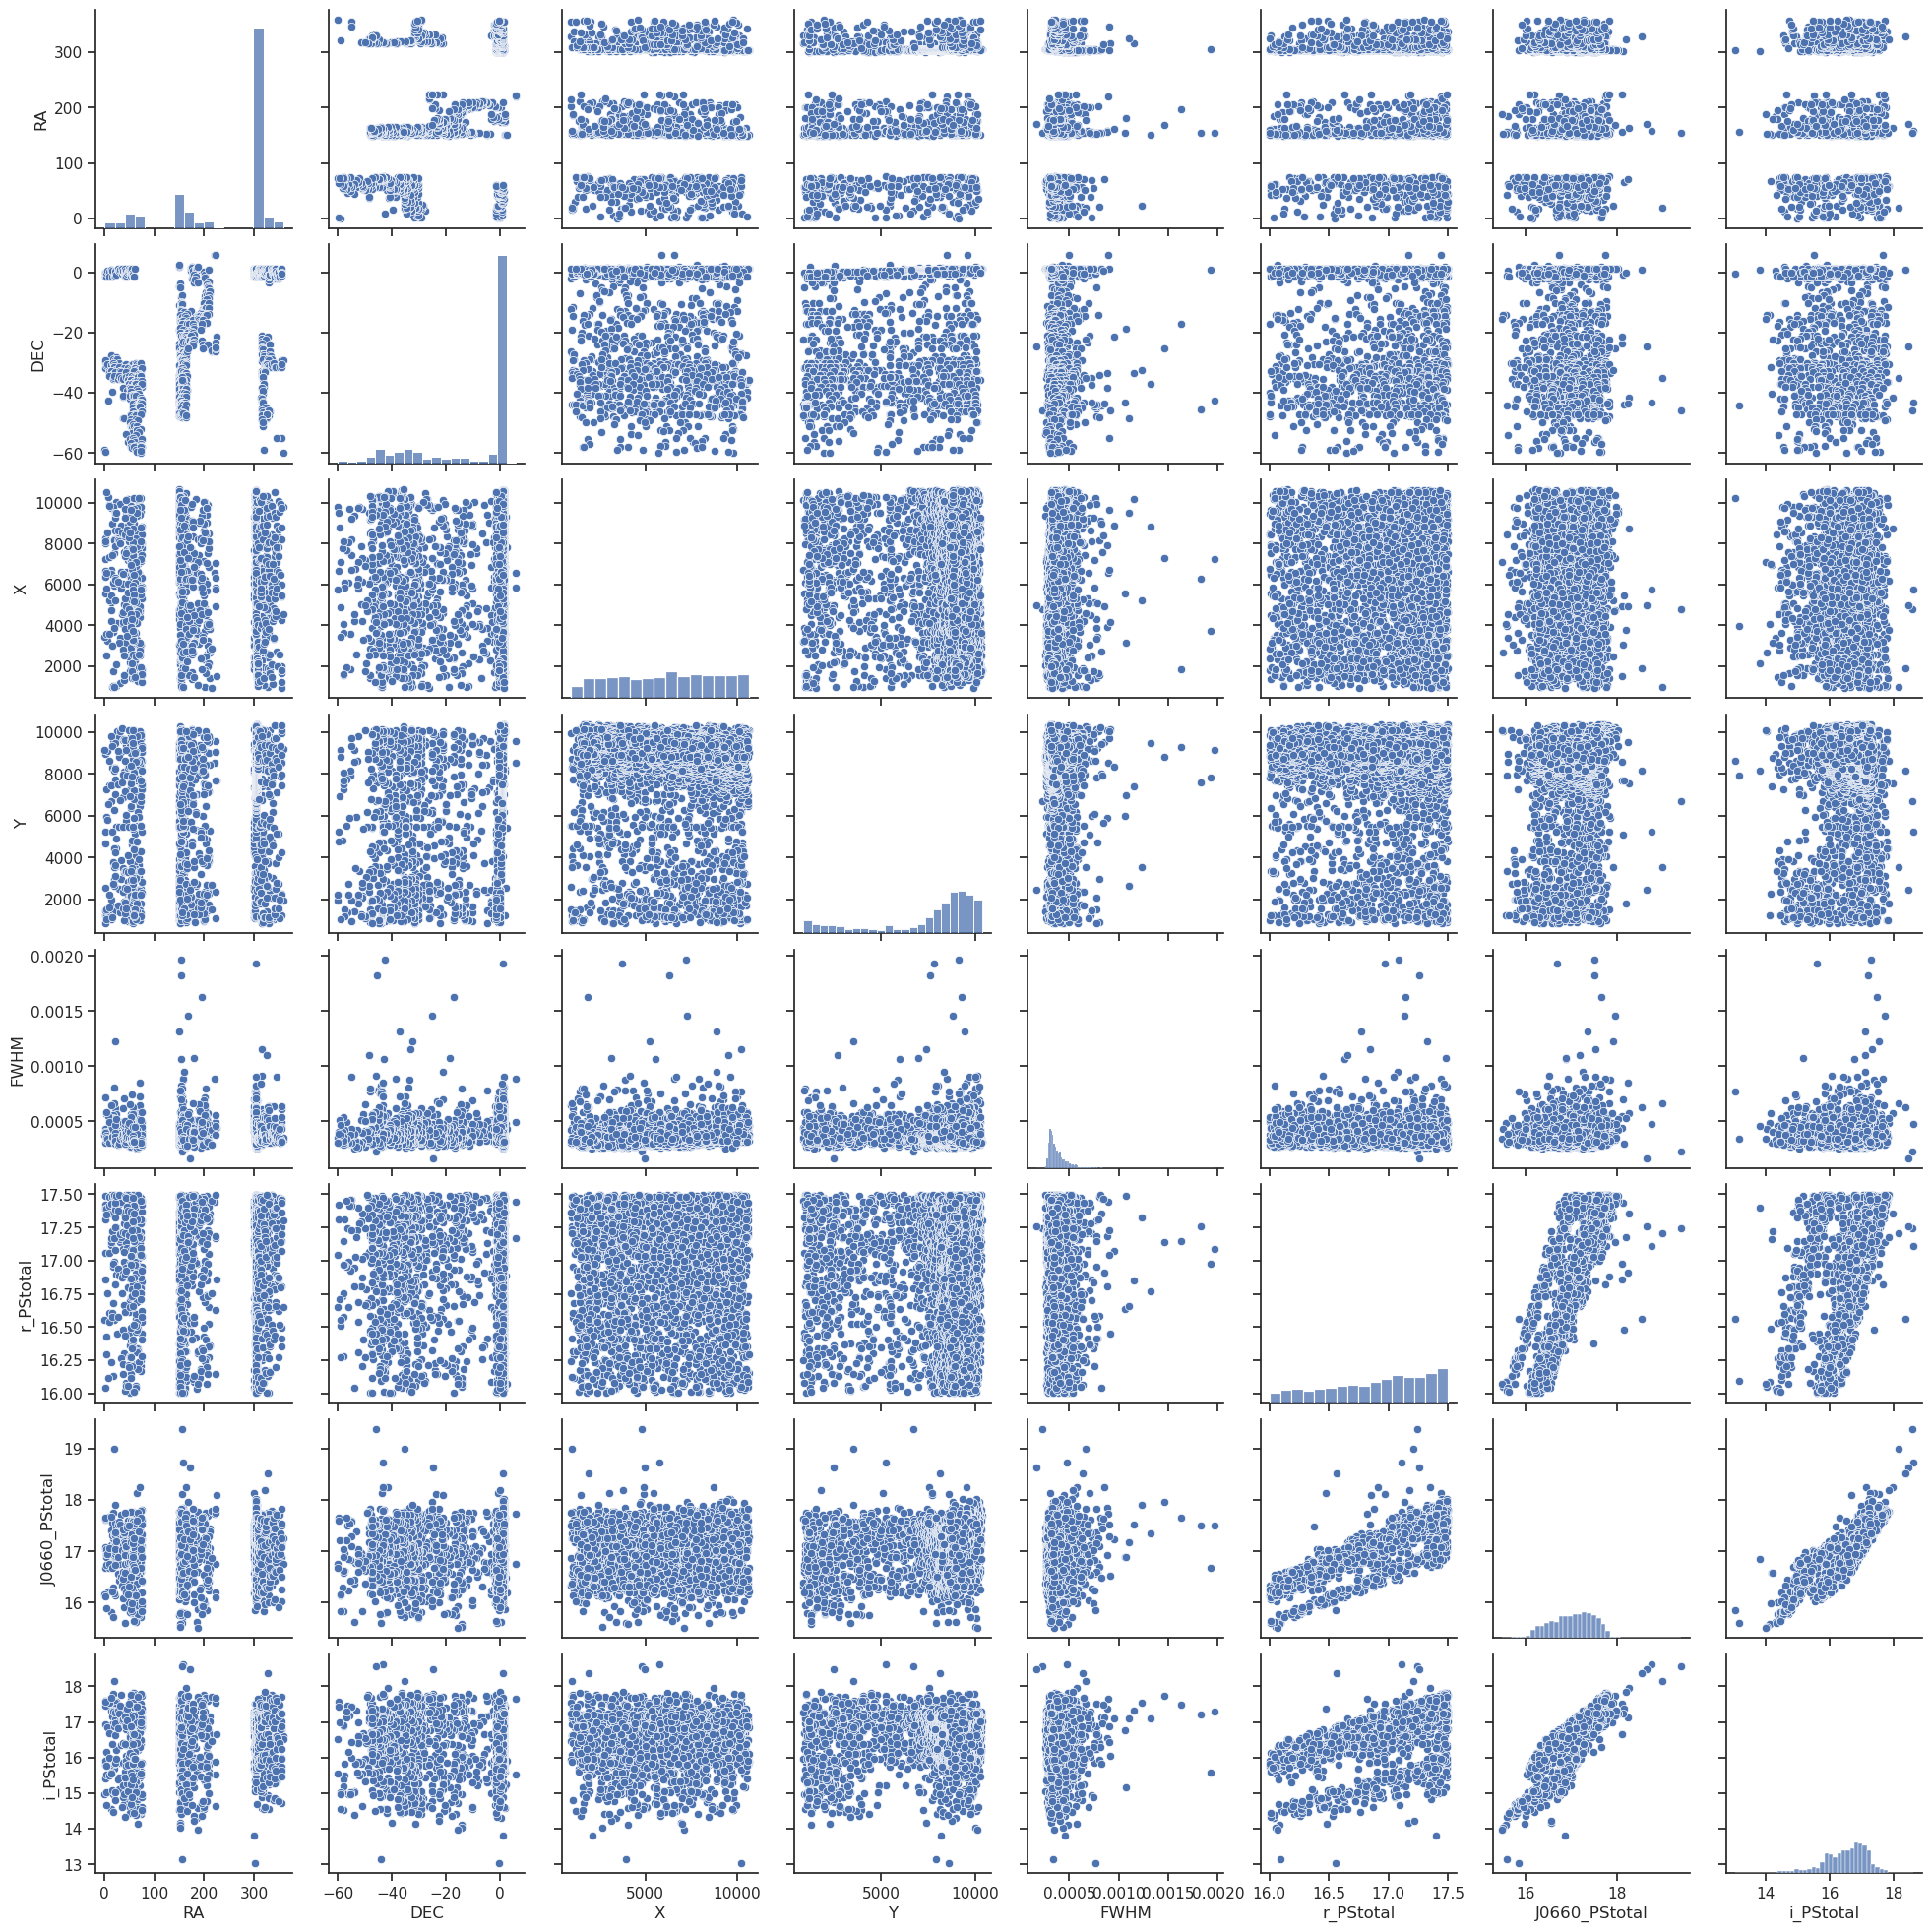

In [46]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_)

### Object in the upper region

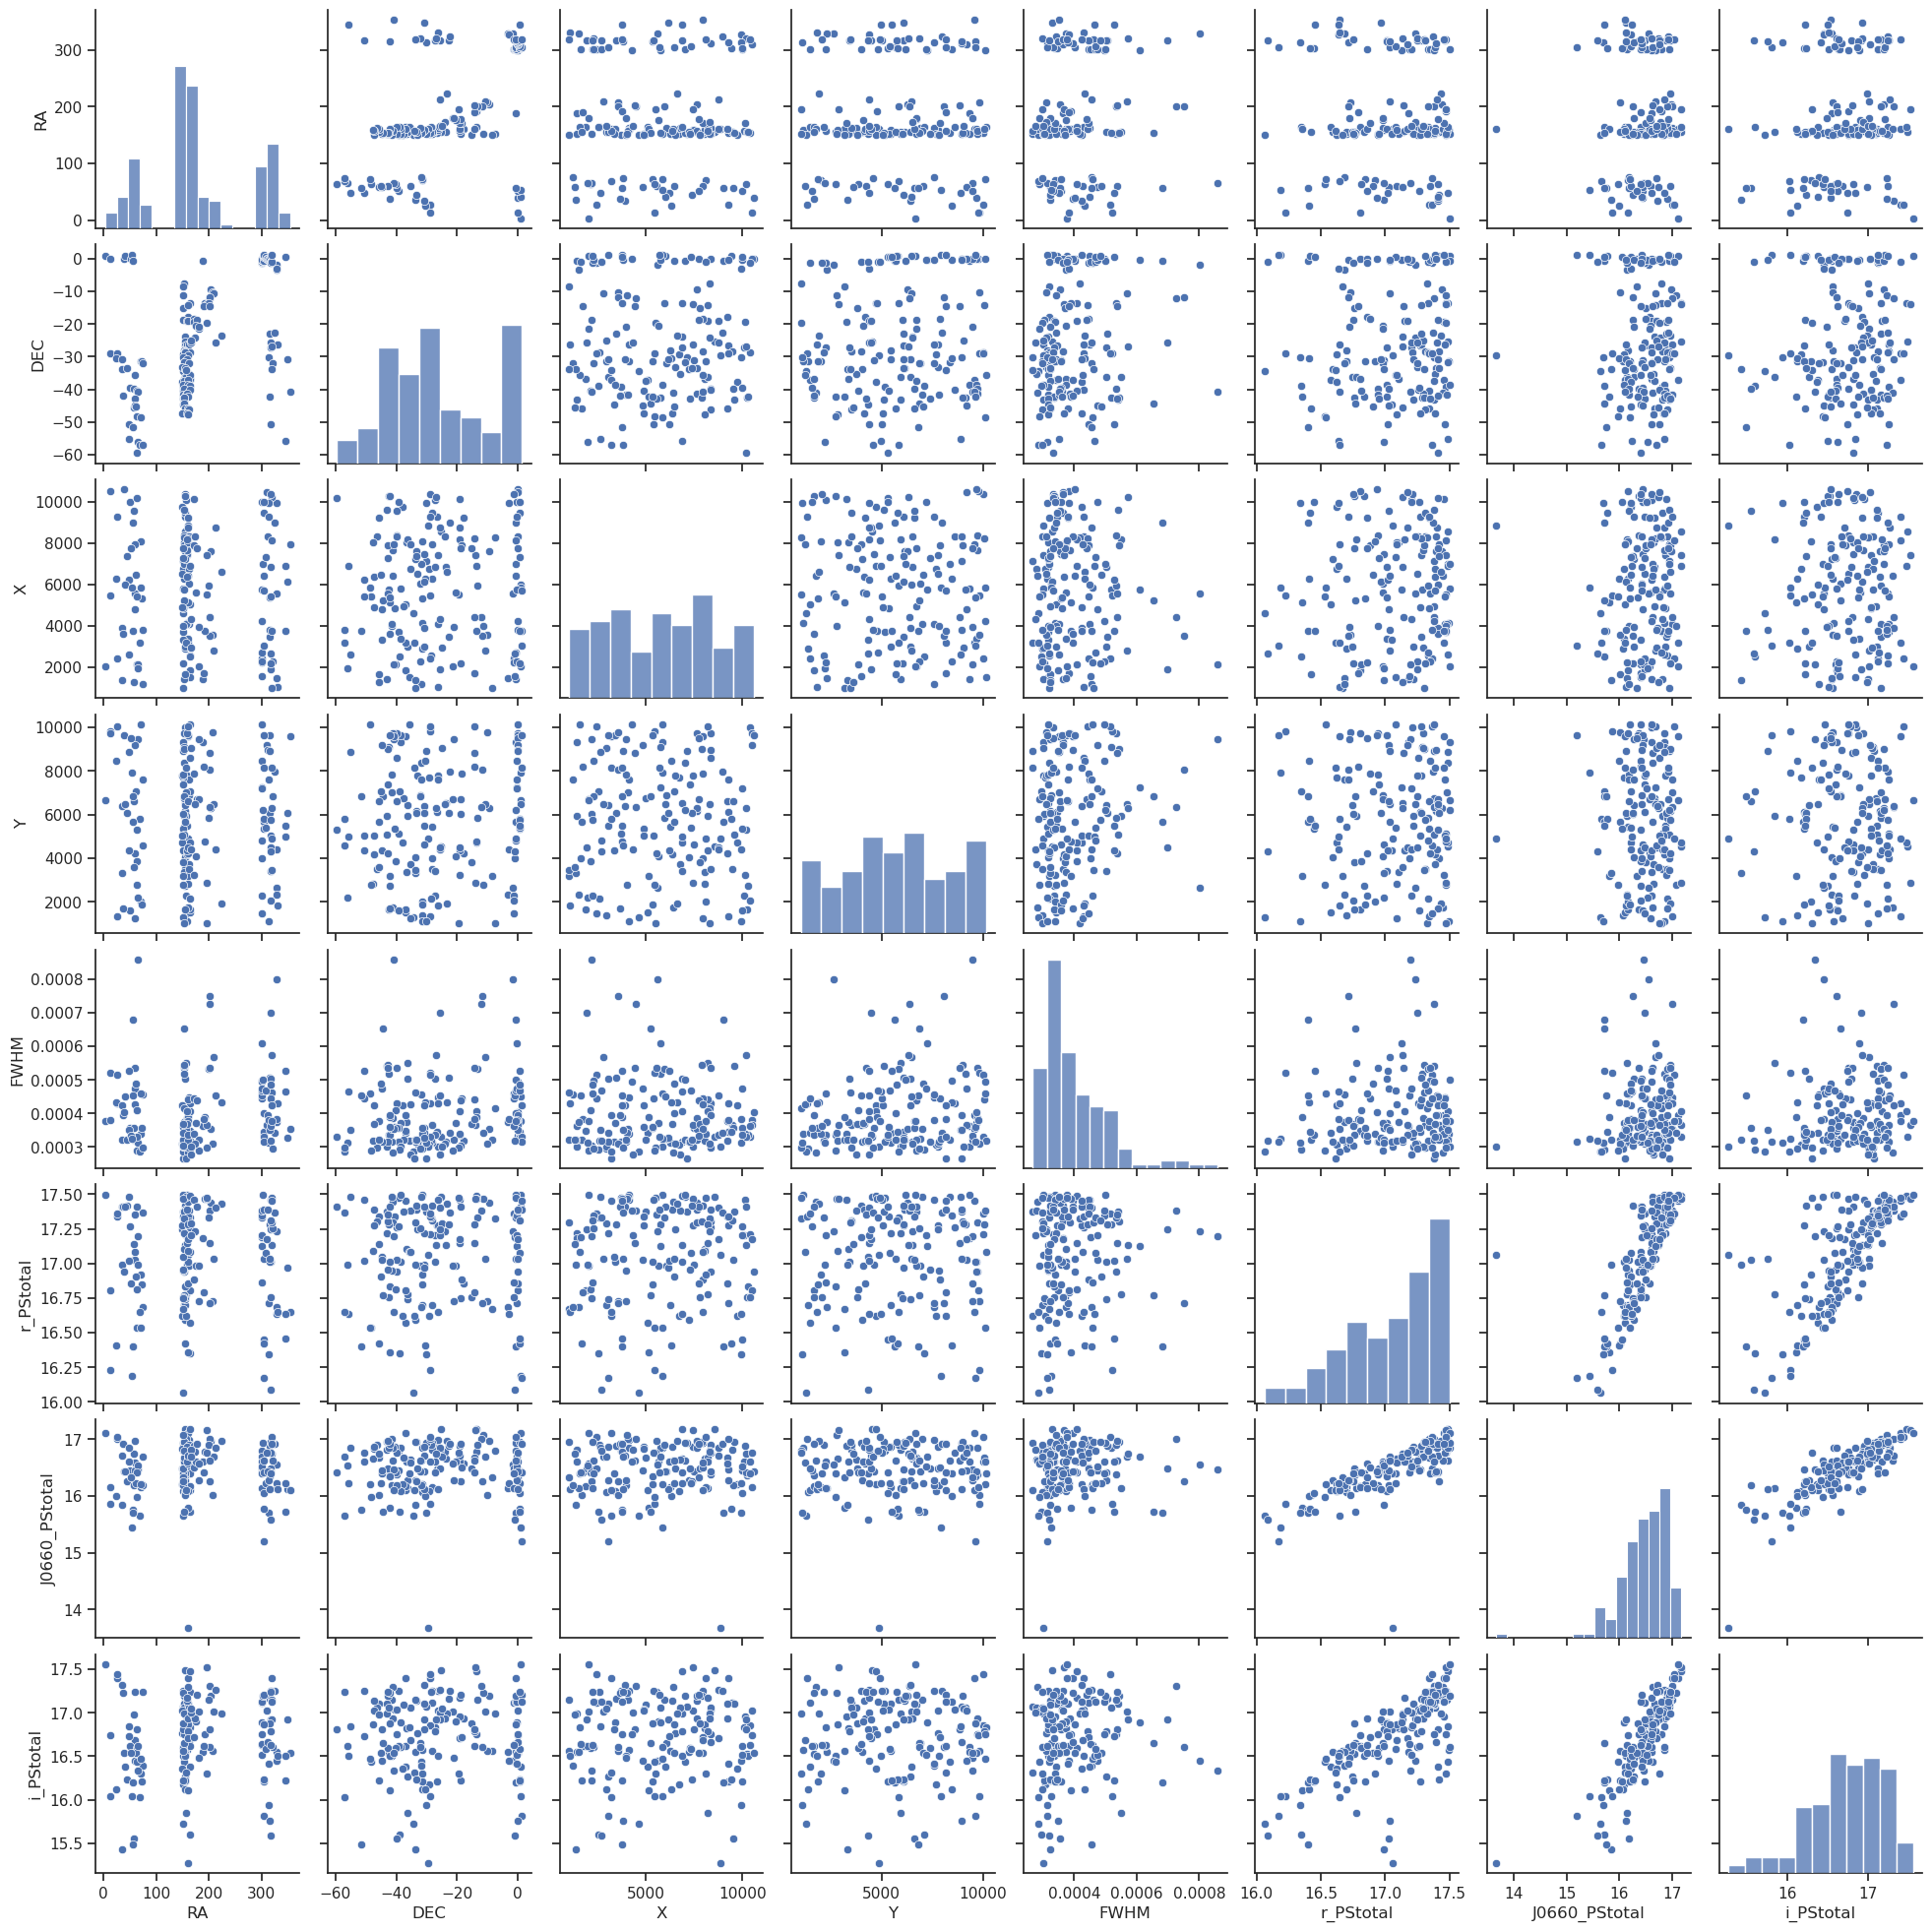

In [47]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_)

### JUST ONE FIELD

In [48]:
mask_field = tab_clean["Field"] == "b'STRIPE82-0170'"
tab_clean_field = tab_clean[mask_field]

In [49]:
tab_clean_field

<Table length=495>
     Field                      ID                       RA                 DEC             X          Y           FWHM     ... J0515_psf e_J0515_psf J0660_psf e_J0660_psf J0861_psf  e_J0861_psf
     str16                    str31                   float64             float64        float64    float64      float64    ...  float64    float64    float64    float64    float64     float64  
---------------- ------------------------------- ------------------ ------------------- ---------- ---------- ------------- ... --------- ----------- --------- ----------- ---------- -----------
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000376' 358.73307506277445 -0.0002457514797156   4516.001   916.8456 0.00034253247 ... 17.171087       0.022        --          --  16.572111        0.04
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000462' 358.94991838192817  0.0052723879779816   3096.529  952.97034  0.0003287349 ...  16.97038       0.021        --          --  15.881601       0.038
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000453' 358.72518747022553  0.0034336334086949   4567.634  940.93243 0.00033050953 ... 18.516962       0.037        --          -- 15.8997345       0.038
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000409'  357.9958375910409  0.0035549699388775    9342.05   941.7279 0.00038176985 ... 17.344988       0.033 16.395008       0.046  16.075373       0.049
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000471' 359.13661274766605  0.0055202984317476    1874.36  954.59424  0.0003411065 ... 17.589111       0.025        --          --  17.145151       0.042
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000838'  358.0620060926749  0.0212735813167264   8908.861  1057.7255 0.00037311274 ...  17.64047       0.036 17.331152       0.037  17.230934       0.058
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000527'  358.6057975799354  0.0104447963552466   5349.155   986.8303 0.00032968094 ... 17.267513       0.024        --          --  16.909222       0.042
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0000722'  359.2693705401812   0.015004855289632 1005.24286 1016.68933  0.0003485548 ... 17.940928        0.03        --          --  16.016615       0.036
             ...                             ...                ...                 ...        ...        ...           ... ...       ...         ...       ...         ...        ...         ...
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0047863'  358.7489509929153  1.3088070164220662  4412.3813   9485.605   0.000330793 ... 17.625456       0.027 16.849669       0.029  16.065239       0.022
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0047921'  359.0837235139056  1.3073774849057338  2221.5093   9476.538  0.0003293378 ... 16.593786        0.02 16.311579       0.027  16.042685        0.02
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048155' 357.92193673320713  1.3036746809839734   9824.658   9452.539 0.00034154812 ...  17.82415       0.027 16.574623       0.061  15.376712       0.018
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048324'  358.3260894219256   1.057939385205069  7179.7407  7843.4766 0.00031575747 ...  17.50822       0.026        --          --  17.148645       0.029
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048211'  357.9831949522526  1.0510638273883102   9423.939  7798.7783 0.00030146056 ...  18.31469       0.032        --          --  16.349434       0.027
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048420'  358.1892272557365  1.3014805905600857  8075.3257    9437.81 0.00033585477 ...  17.26568       0.021 17.067595        0.04  16.788515       0.027
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048652'  357.9578196568796   1.285262215274564   9589.822   9331.941  0.0003190544 ... 17.658428       0.025 17.525522       0.044  17.293554       0.037
b'STRIPE82-0170' b'iDR4_3_STRIPE82-0170_0048808'  359.1238898665182  1.2834971538705466  1958.6162   9320.262 0.00032355354 ... 17.652792       0.026 16.936531       0.029  16.402308       0.022

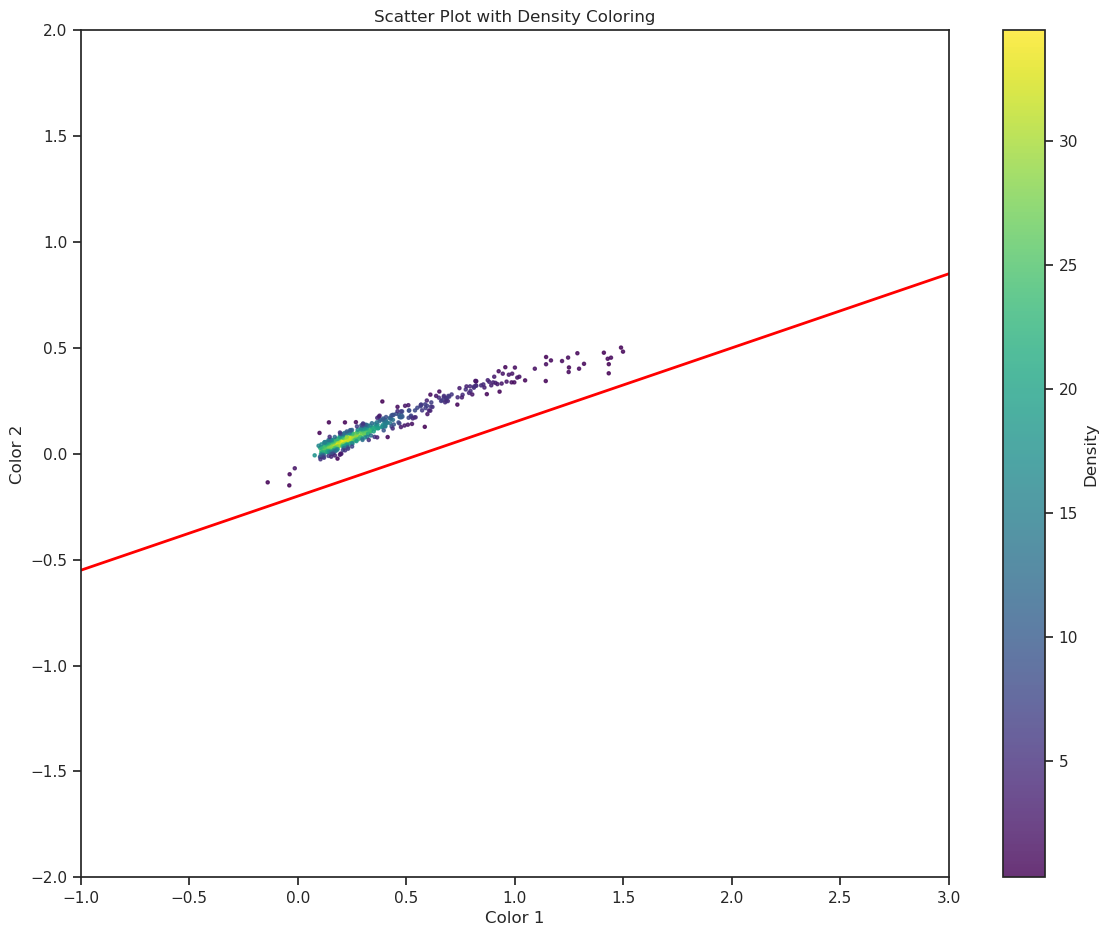

In [50]:
plots(tab_clean_field["r_PStotal"] - tab_clean_field["i_PStotal"], tab_clean_field["r_PStotal"] - tab_clean_field["J0660_PStotal"], x_values, y_values, xlim=(-1.0, 3), ylim=(-2, 2))

In [51]:
# tab_clean_df = tab_clean.to_pandas()
# Save Pandas DataFrame to CSV file
# tab_clean_df.to_csv("Rodrigo-data/Fornax_VAC_RUN1_clean.csv", index=False)